In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [2]:
df = pd.read_csv(
    "/kaggle/input/manipal-atmospherics/manipal_atmospherics_df.csv",
    skiprows=2
)

df["time"] = pd.to_datetime(df["time"])
df = df.sort_values("time").reset_index(drop=True)

df.head()


,time,temperature_2m_mean (°C),precipitation_sum (mm),shortwave_radiation_sum (MJ/m²),apparent_temperature_mean (°C),wind_speed_10m_max (km/h),et0_fao_evapotranspiration (mm),sunshine_duration (s),wind_direction_10m_dominant (°),pressure_msl_mean (hPa),cloud_cover_mean (%),dew_point_2m_mean (°C),soil_moisture_0_to_7cm_mean (m³/m³)
0,2011-01-04,24.7,0.0,19.69,27.7,17.4,4.09,36798.94,325,1009.7,70,20.4,0.278
1,2011-01-05,25.4,0.0,17.77,28.5,15.9,3.91,36494.80,309,1008.7,85,20.4,0.276
2,2011-01-06,26.2,0.0,19.31,28.8,18.4,4.45,36924.74,319,1008.7,61,19.4,0.273
3,2011-01-07,25.6,0.0,20.26,28.0,15.6,4.52,37417.72,178,1008.6,12,18.6,0.270
4,2011-01-08,25.2,0.0,20.29,28.2,15.1,4.38,37473.21,313,1008.3,29,20.0,0.268


In [3]:
print("RAW COLUMN NAMES:")
for col in df.columns:
    print(repr(col))
# Robust column cleanup
df.columns = (
    df.columns
    .str.encode("ascii", "ignore")
    .str.decode("ascii")
    .str.strip()
    .str.replace(" ", "_")
    .str.replace(r"\(.*\)", "", regex=True)
)

print("CLEANED COLUMN NAMES:")
print(df.columns.tolist())
# Remove trailing underscores from column names
df.columns = df.columns.str.rstrip("_")

print(df.columns.tolist())


RAW COLUMN NAMES:
'time'
'temperature_2m_mean (°C)'
'precipitation_sum (mm)'
'shortwave_radiation_sum (MJ/m²)'
'apparent_temperature_mean (°C)'
'wind_speed_10m_max (km/h)'
'et0_fao_evapotranspiration (mm)'
'sunshine_duration (s)'
'wind_direction_10m_dominant (°)'
'pressure_msl_mean (hPa)'
'cloud_cover_mean (%)'
'dew_point_2m_mean (°C)'
'soil_moisture_0_to_7cm_mean (m³/m³)'
CLEANED COLUMN NAMES:
['time', 'temperature_2m_mean_', 'precipitation_sum_', 'shortwave_radiation_sum_', 'apparent_temperature_mean_', 'wind_speed_10m_max_', 'et0_fao_evapotranspiration_', 'sunshine_duration_', 'wind_direction_10m_dominant_', 'pressure_msl_mean_', 'cloud_cover_mean_', 'dew_point_2m_mean_', 'soil_moisture_0_to_7cm_mean_']
['time', 'temperature_2m_mean', 'precipitation_sum', 'shortwave_radiation_sum', 'apparent_temperature_mean', 'wind_speed_10m_max', 'et0_fao_evapotranspiration', 'sunshine_duration', 'wind_direction_10m_dominant', 'pressure_msl_mean', 'cloud_cover_mean', 'dew_point_2m_mean', 'soil_moi

In [4]:
print("Shape:", df.shape)
df.info()


Shape: (5480, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5480 entries, 0 to 5479
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   time                         5480 non-null   datetime64[ns]
 1   temperature_2m_mean          5480 non-null   float64       
 2   precipitation_sum            5480 non-null   float64       
 3   shortwave_radiation_sum      5480 non-null   float64       
 4   apparent_temperature_mean    5480 non-null   float64       
 5   wind_speed_10m_max           5480 non-null   float64       
 6   et0_fao_evapotranspiration   5480 non-null   float64       
 7   sunshine_duration            5480 non-null   float64       
 8   wind_direction_10m_dominant  5480 non-null   int64         
 9   pressure_msl_mean            5480 non-null   float64       
 10  cloud_cover_mean             5480 non-null   int64         
 11  dew_point_2m_mean        

In [5]:
df.describe()


,time,temperature_2m_mean,precipitation_sum,shortwave_radiation_sum,apparent_temperature_mean,wind_speed_10m_max,et0_fao_evapotranspiration,sunshine_duration,wind_direction_10m_dominant,pressure_msl_mean,cloud_cover_mean,dew_point_2m_mean,soil_moisture_0_to_7cm_mean
count,5480,5480.000000,5480.000000,5480.000000,5480.000000,5480.000000,5480.000000,5480.000000,5480.000000,5480.000000,5480.000000,5480.000000,5480.000000
mean,2018-07-05 12:00:00,26.266715,9.319088,18.172217,30.421752,15.881314,3.874894,32432.841095,265.097080,1009.585657,63.644708,22.360255,0.385148
min,2011-01-04 00:00:00,22.700000,0.000000,1.900000,23.700000,5.900000,0.640000,0.000000,0.000000,999.100000,0.000000,10.600000,0.181000
25%,2014-10-04 18:00:00,25.100000,0.000000,15.670000,28.800000,13.500000,3.090000,30436.440000,239.000000,1008.300000,33.000000,21.500000,0.269000
50%,2018-07-05 12:00:00,26.000000,1.100000,19.420000,30.300000,15.700000,4.050000,37166.285000,284.000000,1009.600000,72.000000,23.100000,0.407000
75%,2022-04-05 06:00:00,27.200000,11.600000,21.760000,31.900000,17.925000,4.790000,39066.010000,313.000000,1010.900000,96.000000,23.900000,0.488000
max,2026-01-04 00:00:00,31.100000,169.700000,27.050000,37.000000,40.500000,6.610000,43200.000000,360.000000,1015.600000,100.000000,26.300000,0.516000
std,NaN,1.557200,16.782547,4.956198,2.302532,3.402819,1.203321,11448.653111,68.255966,1.876153,33.339070,2.276768,0.104756


In [6]:
df["year"] = df["time"].dt.year
df["month"] = df["time"].dt.month


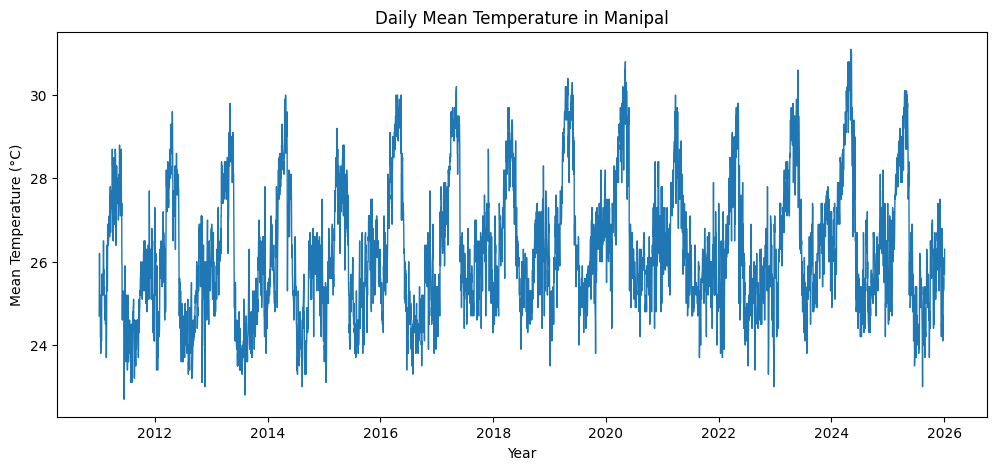

In [7]:
plt.figure(figsize=(12,5))
plt.plot(df["time"], df["temperature_2m_mean"], linewidth=1)
plt.xlabel("Year")
plt.ylabel("Mean Temperature (°C)")
plt.title("Daily Mean Temperature in Manipal")
plt.show()


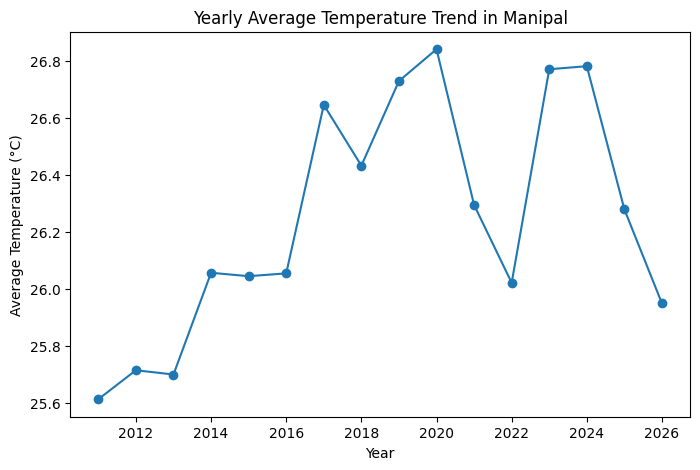

In [8]:
yearly_temp = df.groupby("year")["temperature_2m_mean"].mean()

plt.figure(figsize=(8,5))
plt.plot(yearly_temp.index, yearly_temp.values, marker="o")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.title("Yearly Average Temperature Trend in Manipal")
plt.show()


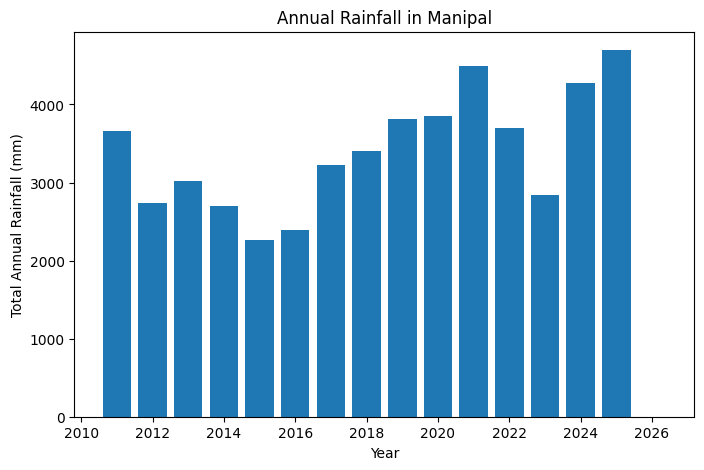

In [9]:
yearly_rain = df.groupby("year")["precipitation_sum"].sum()

plt.figure(figsize=(8,5))
plt.bar(yearly_rain.index, yearly_rain.values)
plt.xlabel("Year")
plt.ylabel("Total Annual Rainfall (mm)")
plt.title("Annual Rainfall in Manipal")
plt.show()


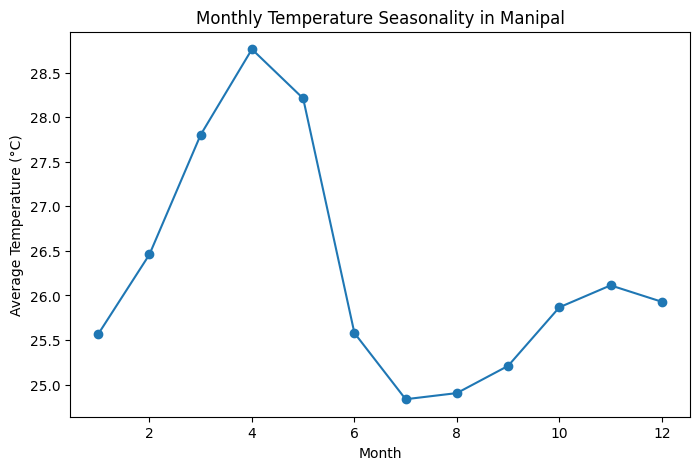

In [10]:
monthly_temp = df.groupby("month")["temperature_2m_mean"].mean()

plt.figure(figsize=(8,5))
plt.plot(monthly_temp.index, monthly_temp.values, marker="o")
plt.xlabel("Month")
plt.ylabel("Average Temperature (°C)")
plt.title("Monthly Temperature Seasonality in Manipal")
plt.show()


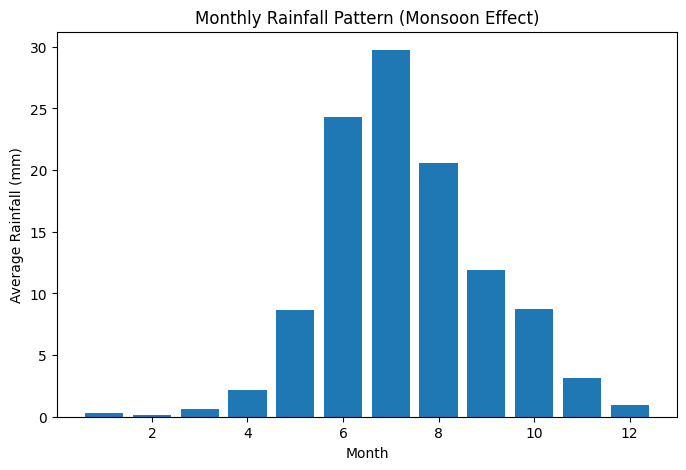

In [11]:
monthly_rain = df.groupby("month")["precipitation_sum"].mean()

plt.figure(figsize=(8,5))
plt.bar(monthly_rain.index, monthly_rain.values)
plt.xlabel("Month")
plt.ylabel("Average Rainfall (mm)")
plt.title("Monthly Rainfall Pattern (Monsoon Effect)")
plt.show()


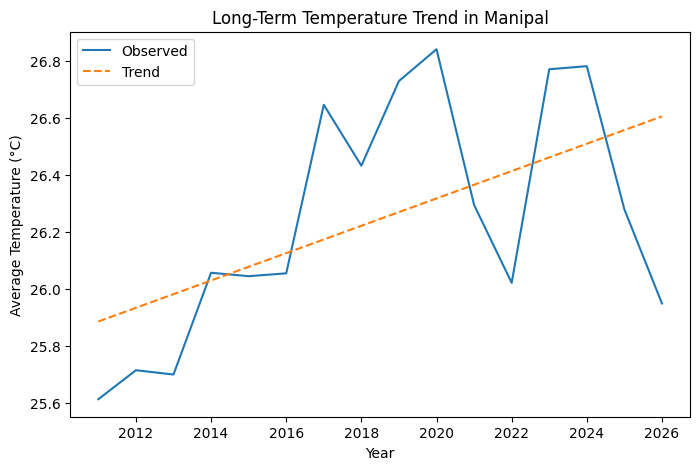

Average temperature increase per year (°C): 0.04800430326561183


In [12]:
z = np.polyfit(yearly_temp.index, yearly_temp.values, 1)
trend = np.poly1d(z)

plt.figure(figsize=(8,5))
plt.plot(yearly_temp.index, yearly_temp.values, label="Observed")
plt.plot(yearly_temp.index, trend(yearly_temp.index), "--", label="Trend")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.title("Long-Term Temperature Trend in Manipal")
plt.legend()
plt.show()

print("Average temperature increase per year (°C):", z[0])


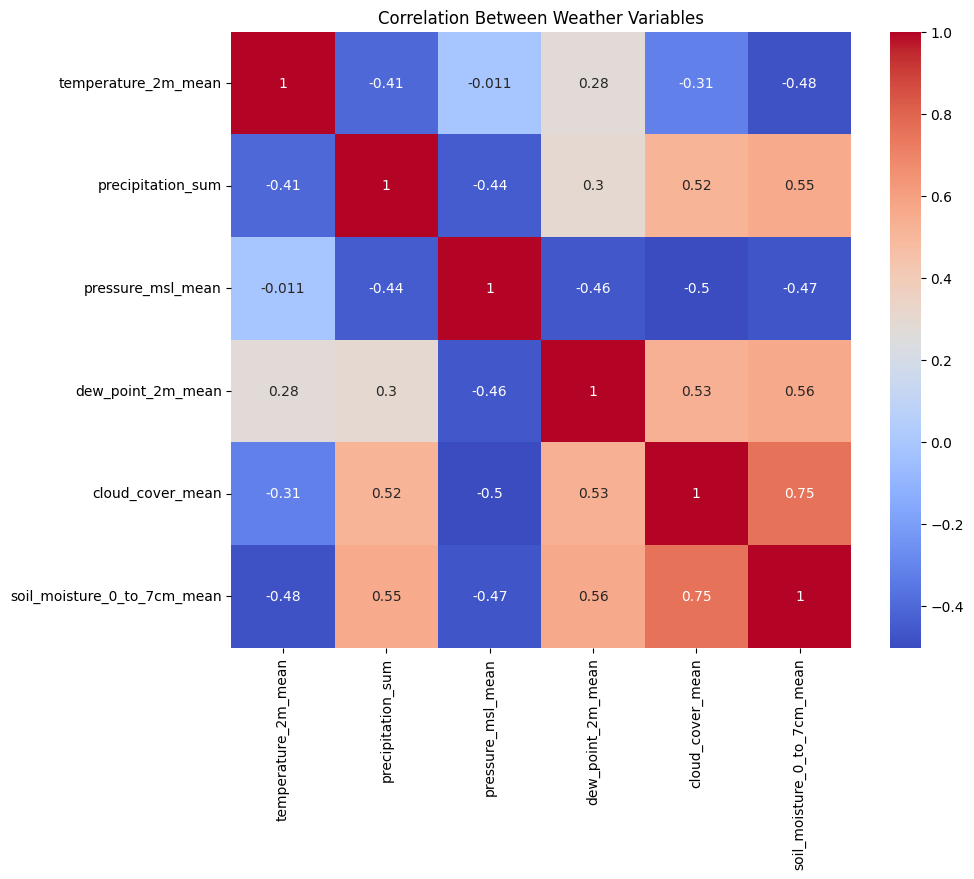

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(
    df[[
        "temperature_2m_mean",
        "precipitation_sum",
        "pressure_msl_mean",
        "dew_point_2m_mean",
        "cloud_cover_mean",
        "soil_moisture_0_to_7cm_mean"
    ]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Between Weather Variables")
plt.show()


### EDA Conclusions

- Manipal exhibits a warm coastal climate with relatively small temperature variation.
- Rainfall is highly seasonal, dominated by the southwest monsoon.
- Yearly average temperature shows a gradual increasing trend, indicating long-term warming.
- These observations motivate the use of sequence models to forecast future climate behavior and study climate change patterns.
